In [1]:
import os
import glob
import pandas as pd
from pandas.errors import EmptyDataError
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv('E:/study/meteoroData_clean/all_states_weather_v3.csv', parse_dates=['date'])
# Cell 3: 中心趋势：整体 & 按州分组
key_vars = ['max_Temperature_C', 'min_Temperature_C', 'max_Humidity_pct', 'min_Humidity_pct', 'wind_speed_m_s']

# 整体均值、中位数
desc_all = df[key_vars].agg(['mean','median']).T
print("Overall mean & median:\n", desc_all)

# 按 state 分组的均值
desc_by_state = df.groupby('state')[key_vars].agg(['mean','median'])
print("\nBy-state mean & median:\n", desc_by_state)

Overall mean & median:
                         mean     median
max_Temperature_C  24.259339  24.500000
min_Temperature_C  12.834982  12.866308
max_Humidity_pct   89.725099  95.000000
min_Humidity_pct   47.472851  48.000000
wind_speed_m_s      3.561740   3.240000

By-state mean & median:
       max_Temperature_C        min_Temperature_C        max_Humidity_pct  \
                   mean median              mean median             mean   
state                                                                      
NSW           23.142834   22.8         11.106531   11.4        89.994918   
QLD           28.932174   29.1         17.531007   18.6        87.175337   
VIC           19.671586   18.7          9.066675    9.1        92.696632   

             min_Humidity_pct        wind_speed_m_s         
      median             mean median           mean median  
state                                                       
NSW     95.0        45.869585   46.0       3.396404   3.11  
QLD     9

In [3]:
var_all = df[key_vars].agg(['std', lambda x: x.quantile(0.75)-x.quantile(0.25)]).T
var_all.rename(columns={'<lambda_0>':'IQR'}, inplace=True)
print("Overall variability:\n", var_all)

# 按月
df['month'] = df['date'].dt.month
var_by_month = df.groupby('month')[key_vars].agg(['mean','std'])
print("\nMonthly mean & std:\n", var_by_month)

Overall variability:
                          std  <lambda>
max_Temperature_C   7.544637     11.00
min_Temperature_C   7.016153     10.60
max_Humidity_pct   13.529633     12.00
min_Humidity_pct   19.342599     28.00
wind_speed_m_s      2.018314      2.34

Monthly mean & std:
       max_Temperature_C           min_Temperature_C            \
                   mean       std              mean       std   
month                                                           
1             29.935176  5.835657         18.473691  5.053894   
2             29.730025  5.494770         17.991257  5.209446   
3             28.318409  5.601411         17.269738  5.264219   
4             24.279761  5.529440         13.315123  5.574077   
5             20.417260  5.787582          9.837735  6.247998   
6             17.975166  6.406187          7.350598  5.755352   
7             17.455600  5.912538          6.886546  5.711197   
8             20.182811  6.337920          8.361602  5.533582   
9      

In [4]:

df = pd.read_csv(r"E:\study\meteoroData_clean\all_states_weather_v2.csv", parse_dates=['date'])
df['month'] = df['date'].dt.month

# 需要做分布可视化的字段列表
key_vars = [
    'max_Temperature_C',
    'min_Temperature_C',
    'max_Humidity_pct',
    'min_Humidity_pct',
    'wind_speed_m_s'
]

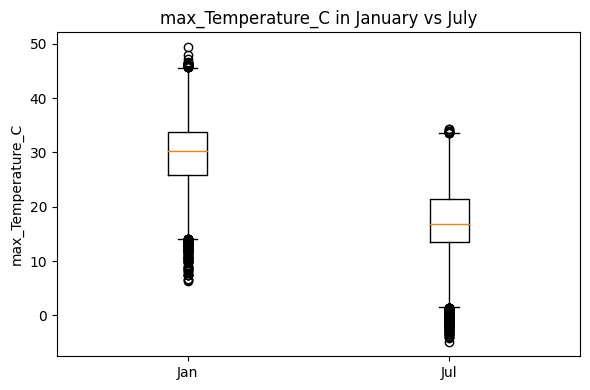

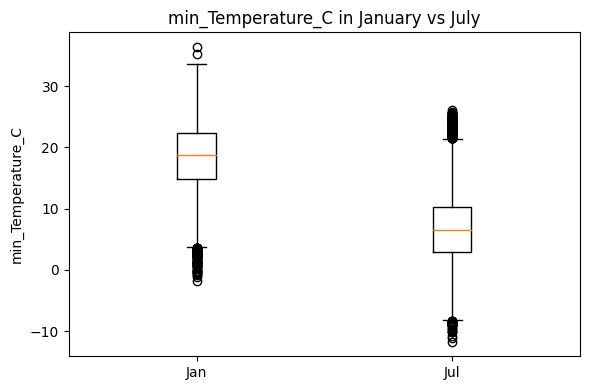

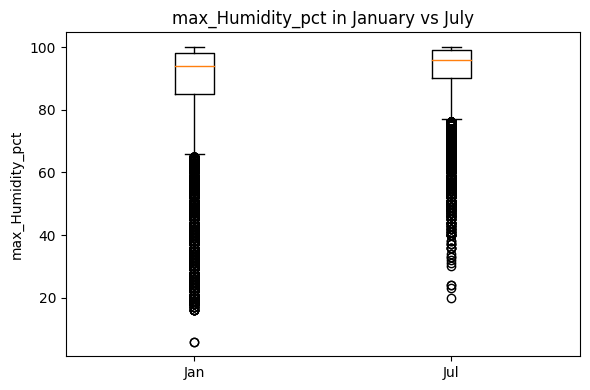

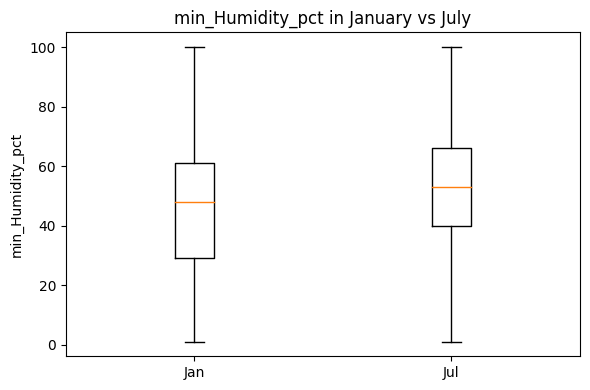

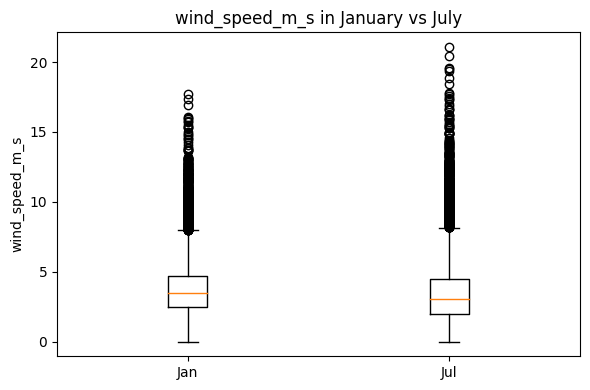

In [5]:
for var in key_vars:
    # 分组取值
    data_jan = df[df.month == 1][var].dropna()
    data_jul = df[df.month == 7][var].dropna()
    plt.figure(figsize=(6,4))
    plt.boxplot([data_jan, data_jul], labels=['Jan','Jul'])
    plt.title(f'{var} in January vs July')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

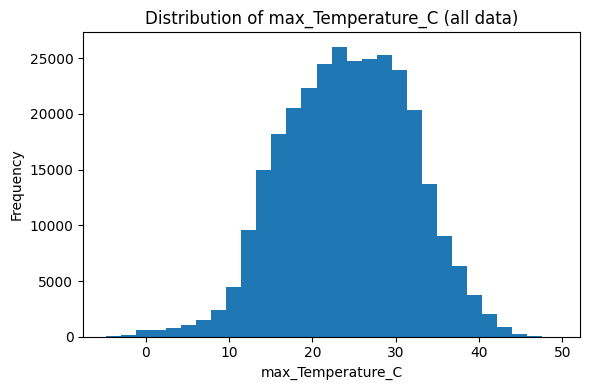

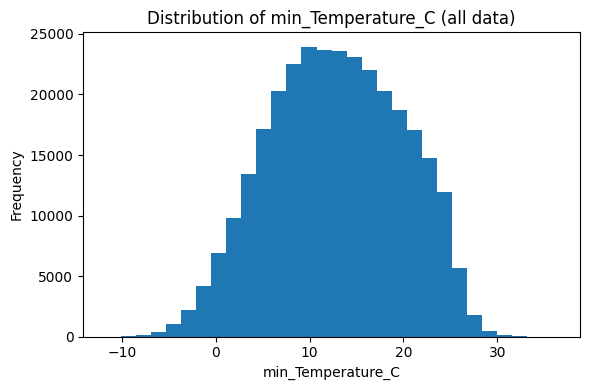

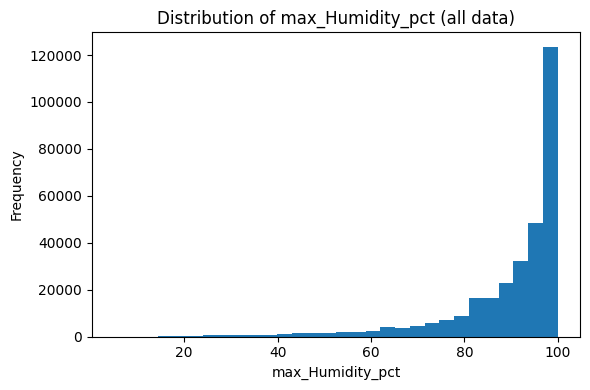

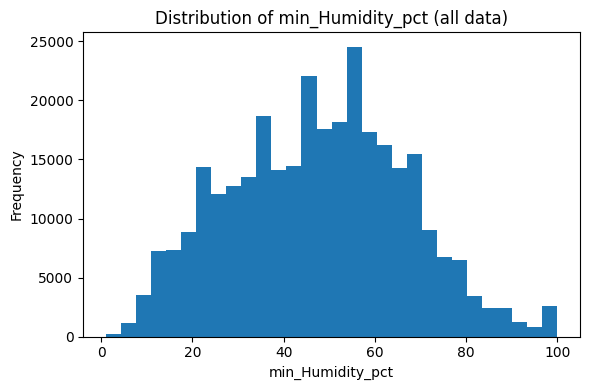

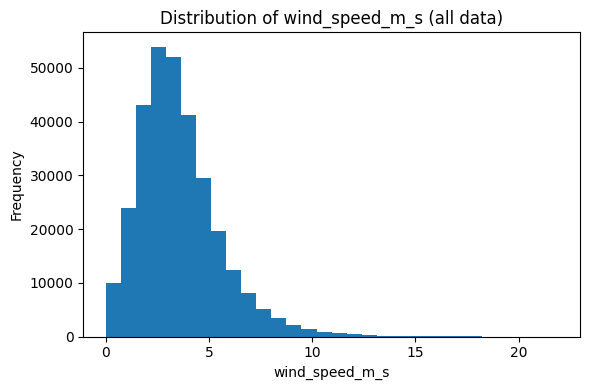

In [6]:
for var in key_vars:
    plt.figure(figsize=(6,4))
    plt.hist(df[var].dropna(), bins=30)
    plt.title(f'Distribution of {var} (all data)')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()